In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv('../Data/Miles_Traveled.csv', index_col=0, parse_dates=True)

df.index.freq='MS'

df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [3]:
df.columns = ['Distance']

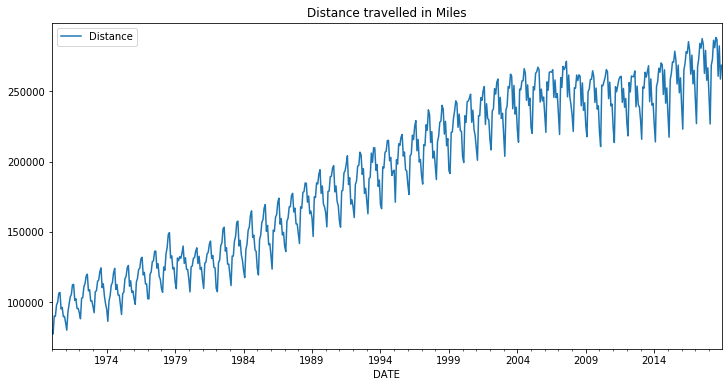

In [4]:
title = 'Distance travelled in Miles'
df.plot(title=title);

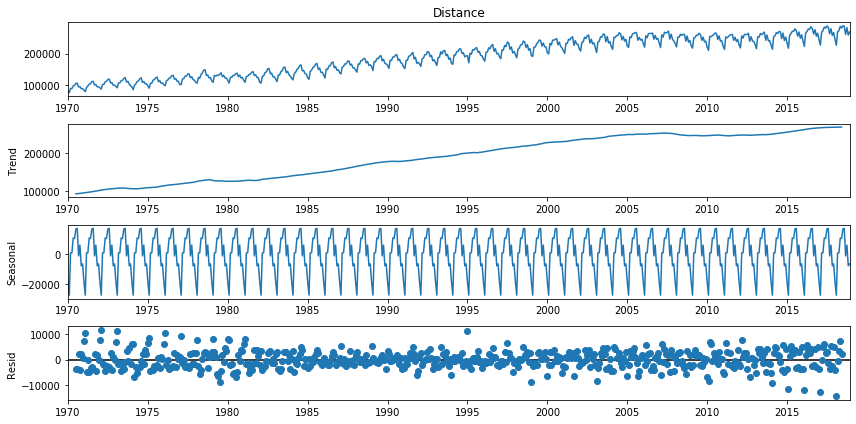

In [5]:
seasonal_decompose(df['Distance'], model='add').plot();

In [7]:
from pmdarima import auto_arima

In [8]:
auto_arima(df['Distance'], start_p=0, start_q=0, seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  588
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -5441.941
Date:                            Sun, 05 Jul 2020   AIC                          10897.882
Time:                                    18:59:57   BIC                          10928.363
Sample:                                         0   HQIC                         10909.770
                                            - 588                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -17.0867     99.900     -0.171      0.864    -212.888     178.714
ar.L1         -0.9563      0.026    -36.364      0.000      -1.008      -0.905
ma.L1          0.7121      0.025     28.913      0.000       0.664       0.760
ma.L2         -0.2712      0.011    -25.301      0.000      -0.292      -0.250
ma.S.L12      -0.3367      0.024    -14.084      0.000      -0.384      -0.290
ma.S.L24      -0.1764      0.016    -11.268      0.000      -0.207      -0.146
sigma2      9.803e+06      0.005   1.85e+09      0.000     9.8e+06     9.8e+06
===================================================================================
Ljung-Box (Q):                      119.89   Jarque-Bera (JB):               424.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.70
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.5e+24. Standard errors may be unstable.
"""

In [9]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
model = SARIMAX(train['Distance'],order=(1, 1, 2), seasonal_order=(0, 1, 2, 12)).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Distance   No. Observations:                  576
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -5330.167
Date:                            Sun, 05 Jul 2020   AIC                          10672.334
Time:                                    19:00:34   BIC                          10698.334
Sample:                                01-01-1970   HQIC                         10682.484
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9600      0.025    -38.362      0.000      -1.009      -0.911
ma.L1          0.7215      0.023     31.143      0.000       0.676       0.767
ma.L2         -0.2650      0.011    -24.968      0.000      -0.286      -0.244
ma.S.L12      -0.3423      0.024    -14.416      0.000      -0.389      -0.296
ma.S.L24      -0.1786      0.016    -11.354      0.000      -0.209      -0.148
sigma2      9.934e+06   7.91e-10   1.26e+16      0.000    9.93e+06    9.93e+06
===================================================================================
Ljung-Box (Q):                      120.35   Jarque-Bera (JB):               397.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.69
Prob(H) (two-sided):                  0.68   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.59e+31. Standard errors may be unstable.
"""

In [13]:
result = model.predict(start=len(train), end=len(train) +len(test) -1, typ='levels', dynamic=False).rename('SARIMA Predictions')

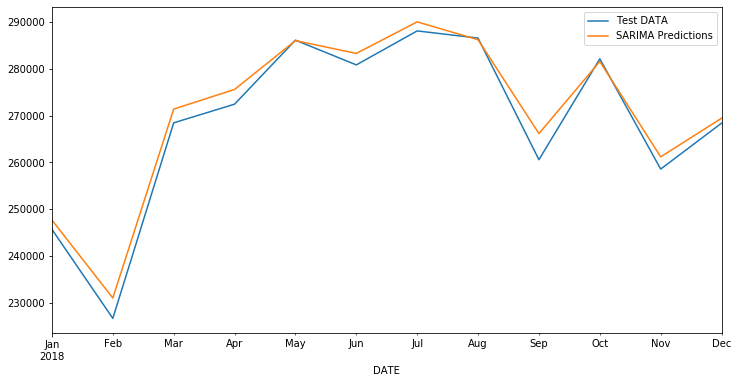

In [14]:
test['Distance'].plot(label='Test DATA')
result.plot()
plt.legend();

In [15]:
from statsmodels.tools.eval_measures import rmse

In [16]:
print('RMSE: {}'.format(rmse(test['Distance'], result)))

RMSE: 2753.366831038218


In [17]:
test['Distance'].mean()

268739.6666666667